## Import Library

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_visible_devices(physical_devices[0], 'GPU')

In [3]:
import os
import cv2
import random

import pathlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from glob import glob
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import DenseNet169
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization

from keras.callbacks import ModelCheckpoint, EarlyStopping

## Import Dataset

In [4]:
total_files = 0

for dirpath, dirname, filename in os.walk("/content/drive/MyDrive/Dataset Tugas Akhir/dataset_split_80_10_10"):
    total_files += len(filename)
    print(f"There are {len(dirname)} Directory and {len(filename)} image in '{dirpath}'.")

print(f"Total number of files: {total_files}")

There are 3 Directory and 0 image in '/content/drive/MyDrive/Dataset Tugas Akhir/dataset_split_80_10_10'.
There are 3 Directory and 0 image in '/content/drive/MyDrive/Dataset Tugas Akhir/dataset_split_80_10_10/val'.
There are 0 Directory and 70 image in '/content/drive/MyDrive/Dataset Tugas Akhir/dataset_split_80_10_10/val/Tuberculosis'.
There are 0 Directory and 400 image in '/content/drive/MyDrive/Dataset Tugas Akhir/dataset_split_80_10_10/val/Normal'.
There are 0 Directory and 250 image in '/content/drive/MyDrive/Dataset Tugas Akhir/dataset_split_80_10_10/val/Pneumonia'.
There are 3 Directory and 0 image in '/content/drive/MyDrive/Dataset Tugas Akhir/dataset_split_80_10_10/test'.
There are 0 Directory and 70 image in '/content/drive/MyDrive/Dataset Tugas Akhir/dataset_split_80_10_10/test/Tuberculosis'.
There are 0 Directory and 400 image in '/content/drive/MyDrive/Dataset Tugas Akhir/dataset_split_80_10_10/test/Normal'.
There are 0 Directory and 250 image in '/content/drive/MyDrive/

In [5]:
data_dir = pathlib.Path("/content/drive/MyDrive/Dataset Tugas Akhir/Thorax_dataset/")
class_name = np.array([sorted([item.name for item in data_dir.glob("*")])])
class_name

array([['Normal', 'Pneumonia', 'Tuberculosis']], dtype='<U12')

## Labelling and Adding Contrast Limited Adaptive Histogram Equalization (CLAHE)

In [ ]:
# Preprocess and load data
data = []
labels = []

normal = os.listdir("/content/drive/MyDrive/Dataset Tugas Akhir/Thorax_dataset/Normal/")
for i in normal:
    image = cv2.imread("/content/drive/MyDrive/Dataset Tugas Akhir/Thorax_dataset/Normal/" + i)
    resized_image = cv2.resize(image, (224, 224))
    data.append(resized_image)
    labels.append(0)

In [ ]:
tbc = os.listdir("/content/drive/MyDrive/Dataset Tugas Akhir/Thorax_dataset/Tuberculosis/")
for i in tbc:
    image = cv2.imread("/content/drive/MyDrive/Dataset Tugas Akhir/Thorax_dataset/Tuberculosis/" + i)
    resized_image = cv2.resize(image, (224, 224))
    data.append(resized_image)
    labels.append(1)

In [ ]:

pneumonia = os.listdir("/content/drive/MyDrive/Dataset Tugas Akhir/Thorax_dataset/Pneumonia/")
for i in pneumonia:
    image = cv2.imread("/content/drive/MyDrive/Dataset Tugas Akhir/Thorax_dataset/Pneumonia/" + i)
    resized_image = cv2.resize(image, (224, 224))
    data.append(resized_image)
    labels.append(2)

In [ ]:
data = np.array(data)
labels = np.array(labels)

## Splitting Folder (Train, Val, Test)

In [ ]:
# # Split dataset into train, validation, and test set
# input_folder = "./Thorax_dataset"
# output_folder = "./dataset_split"
# split_ratio = (0.80, 0.10, 0.10)
# splitfolders.ratio(input_folder, output_folder, seed=42, ratio=split_ratio, group_prefix=None)

In [6]:
train_folder = "/content/drive/MyDrive/Dataset Tugas Akhir/dataset_split_80_10_10/train"
val_folder = "/content/drive/MyDrive/Dataset Tugas Akhir/dataset_split_80_10_10/val"
test_folder = "/content/drive/MyDrive/Dataset Tugas Akhir/dataset_split_80_10_10/test"

In [7]:
total_splitted = 0

for dirpath, dirname, filename in os.walk("/content/drive/MyDrive/Dataset Tugas Akhir/dataset_split_80_10_10"):
    total_splitted += len(filename)
    print(f"There are {len(dirname)} Directory and {len(filename)} image in '{dirpath}'.")

print(f"\nTotal number of files splitted data: {total_splitted}")

There are 3 Directory and 0 image in '/content/drive/MyDrive/Dataset Tugas Akhir/dataset_split_80_10_10'.
There are 3 Directory and 0 image in '/content/drive/MyDrive/Dataset Tugas Akhir/dataset_split_80_10_10/val'.
There are 0 Directory and 70 image in '/content/drive/MyDrive/Dataset Tugas Akhir/dataset_split_80_10_10/val/Tuberculosis'.
There are 0 Directory and 400 image in '/content/drive/MyDrive/Dataset Tugas Akhir/dataset_split_80_10_10/val/Normal'.
There are 0 Directory and 250 image in '/content/drive/MyDrive/Dataset Tugas Akhir/dataset_split_80_10_10/val/Pneumonia'.
There are 3 Directory and 0 image in '/content/drive/MyDrive/Dataset Tugas Akhir/dataset_split_80_10_10/test'.
There are 0 Directory and 70 image in '/content/drive/MyDrive/Dataset Tugas Akhir/dataset_split_80_10_10/test/Tuberculosis'.
There are 0 Directory and 400 image in '/content/drive/MyDrive/Dataset Tugas Akhir/dataset_split_80_10_10/test/Normal'.
There are 0 Directory and 250 image in '/content/drive/MyDrive/

### Preprocessing Data train, test, val

In [8]:
# Function to apply Contrast Limited Adaptive Histogram Equalization (CLAHE) on image
def apply_clahe(image):
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    l = clahe.apply(l)
    lab = cv2.merge((l, a, b))
    clahe_image = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
    return clahe_image

In [9]:
# Preprocess and load train set
train_data = []
train_labels = []

# Preprocess and load validation set
val_data = []
val_labels = []

# Preprocess and load test set
test_data = []
test_labels = []

In [10]:
train_normal = os.listdir(train_folder + "/Normal/")
for i in train_normal:
    image = cv2.imread(train_folder + "/Normal/" + i)
    if image is not None:
        clahe_image = apply_clahe(image)
        resized_image = cv2.resize(clahe_image, (224, 224))
        train_data.append(resized_image)
        train_labels.append(0)

train_tbc = os.listdir(train_folder + "/Tuberculosis/")
for i in train_tbc:
    image = cv2.imread(train_folder + "/Tuberculosis/" + i)
    if image is not None:
        clahe_image = apply_clahe(image)
        resized_image = cv2.resize(clahe_image, (224, 224))
        train_data.append(resized_image)
        train_labels.append(1)

train_pneumonia = os.listdir(train_folder + "/Pneumonia/")
for i in train_pneumonia:
    image = cv2.imread(train_folder + "/Pneumonia/" + i)
    if image is not None:
        clahe_image = apply_clahe(image)
        resized_image = cv2.resize(clahe_image, (224, 224))
        train_data.append(resized_image)
        train_labels.append(2)

In [11]:
val_normal = os.listdir(val_folder + "/Normal/")
for i in val_normal:
    image = cv2.imread(val_folder + "/Normal/" + i)
    if image is not None:
      clahe_image = apply_clahe(image)
      resized_image = cv2.resize(clahe_image, (224, 224))
      val_data.append(resized_image)
      val_labels.append(0)

val_tbc = os.listdir(val_folder + "/Tuberculosis/")
for i in val_tbc:
    image = cv2.imread(val_folder + "/Tuberculosis/" + i)
    if image is not None:
      clahe_image = apply_clahe(image)
      resized_image = cv2.resize(clahe_image, (224, 224))
      val_data.append(resized_image)
      val_labels.append(1)

val_pneumonia = os.listdir(val_folder + "/Pneumonia/")
for i in val_pneumonia:
    image = cv2.imread(val_folder + "/Pneumonia/" + i)
    if image is not None:
      clahe_image = apply_clahe(image)
      resized_image = cv2.resize(clahe_image, (224, 224))
      val_data.append(resized_image)
      val_labels.append(2)

In [12]:
test_normal = os.listdir(test_folder + "/Normal/")
for i in test_normal:
    image = cv2.imread(test_folder + "/Normal/" + i)
    if image is not None:
      clahe_image = apply_clahe(image)
      resized_image = cv2.resize(clahe_image, (224, 224))
      test_data.append(resized_image)
      test_labels.append(0)

test_tbc = os.listdir(test_folder + "/Tuberculosis/")
for i in test_tbc:
    image = cv2.imread(test_folder + "/Tuberculosis/" + i)
    if image is not None:
      clahe_image = apply_clahe(image)
      resized_image = cv2.resize(clahe_image, (224, 224))
      test_data.append(resized_image)
      test_labels.append(1)

test_pneumonia = os.listdir(test_folder + "/Pneumonia/")
for i in test_pneumonia:
    image = cv2.imread(test_folder + "/Pneumonia/" + i)
    if image is not None:
      clahe_image = apply_clahe(image)
      resized_image = cv2.resize(clahe_image, (224, 224))
      test_data.append(resized_image)
      test_labels.append(2)

In [13]:
train_data = np.array(train_data)
val_data = np.array(val_data)
test_data = np.array(test_data)

In [14]:
train_labels = np.array(train_labels)
val_labels = np.array(val_labels)
test_labels = np.array(test_labels)

## Preprocessing

In [ ]:
# Augmentasi Data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_augmentation = ImageDataGenerator(
    rotation_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

In [ ]:
# Buat arsitektur DenseNet169

import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, GlobalAveragePooling2D, Dense, Concatenate
from tensorflow.keras.models import Model

def dense_block(x, blocks, name):
    for i in range(blocks):
        x = conv_block(x, 32, name=name + '_block' + str(i + 1))
    return x

def transition_block(x, reduction, name):
    x = BatchNormalization(axis=3, epsilon=1.001e-5, name=name + '_bn')(x)
    x = Activation('relu', name=name + '_relu')(x)
    x = Conv2D(int(tf.keras.backend.int_shape(x)[-1] * reduction), 1, use_bias=False, name=name + '_conv')(x)
    x = tf.keras.layers.AveragePooling2D(2, strides=2, name=name + '_pool')(x)
    return x

def conv_block(x, growth_rate, name):
    x1 = BatchNormalization(axis=3, epsilon=1.001e-5, name=name + '_0_bn')(x)
    x1 = Activation('relu', name=name + '_0_relu')(x1)
    x1 = Conv2D(4 * growth_rate, 1, use_bias=False, name=name + '_1_conv')(x1)
    x1 = BatchNormalization(axis=3, epsilon=1.001e-5, name=name + '_1_bn')(x1)
    x1 = Activation('relu', name=name + '_1_relu')(x1)
    x1 = Conv2D(growth_rate, 3, padding='same', use_bias=False, name=name + '_2_conv')(x1)
    x = Concatenate(axis=3, name=name + '_concat')([x, x1])
    return x

def DenseNet169(input_shape=(224,224,3), classes=3):
    img_input = Input(shape=input_shape)
    x = Conv2D(64, 7, strides=2, use_bias=False, padding='same', name='conv1/conv')(img_input)
    x = BatchNormalization(axis=3, epsilon=1.001e-5, name='conv1/bn')(x)
    x = Activation('relu', name='conv1/relu')(x)
    x = tf.keras.layers.MaxPooling2D(3, strides=2, padding='same', name='pool1')(x)

    x = dense_block(x, 6, name='conv2')
    x = transition_block(x, 0.5, name='pool2')
    x = dense_block(x, 12, name='conv3')
    x = transition_block(x, 0.5, name='pool3')
    x = dense_block(x, 32, name='conv4')
    x = transition_block(x, 0.5, name='pool4')
    x = dense_block(x, 32, name='conv5')

    x = BatchNormalization(axis=3, epsilon=1.001e-5, name='bn')(x)
    x = Activation('relu', name='relu')(x)

#     x = GlobalAveragePooling2D(name='avg_pool')(x)
#     x = Dense(classes, activation='softmax', name='Fully_Connected')(x)

    model = Model(img_input, x, name='densenet169')
    return model

In [ ]:
input_shape = (224, 224, 3)
num_label = 3
dense_net = DenseNet169(input_shape=input_shape, classes=num_label)

for layer in dense_net.layers:
    layer.trainable = False

In [ ]:
dense_net.summary()

Model: "densenet169"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1/conv (Conv2D)         (None, 112, 112, 64)         9408      ['input_1[0][0]']             
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1/conv[0][0]']          
 on)                                                                                              
                                                                                                  
 conv1/relu (Activation)     (None, 112, 112, 64)         0         ['conv1/bn[0][0]']  

In [ ]:
from keras.utils import plot_model
from tensorflow.keras.utils import plot_model

plot_model(dense_net, to_file='/content/drive/MyDrive/Fix/dataset-2100/arsitektur-densenet.png')

In [ ]:
rescaling = tf.keras.layers.Rescaling(scale=1/255)

model = tf.keras.Sequential([
    tf.keras.Input(shape=(224,224,3)),
    rescaling,
    dense_net,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(num_label),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 densenet169 (Functional)    (None, 7, 7, 1664)        12642880  
                                                                 
 flatten (Flatten)           (None, 81536)             0         
                                                                 
 dropout (Dropout)           (None, 81536)             0         
                                                                 
 dense (Dense)               (None, 256)               20873472  
                                                                 
 dense_1 (Dense)             (None, 3)                 771       
                                                                 
Total params: 33517123 (127.86 MB)
Trainable params: 208

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='/content/drive/MyDrive/Fix/dataset-2100/model.png')

In [ ]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)

## Train Model

In [ ]:
# Train the model
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=15, verbose=1)
mc = ModelCheckpoint('/content/drive/MyDrive/Fix/dataset-7200/collab-bestmodel-cnn-svm-manual.h5', monitor='val_loss', mode='min', save_best_only=True)

history = model.fit(
    data_augmentation.flow(train_data, train_labels, batch_size=64),
    validation_data=(val_data, val_labels),
    epochs = 25,
    callbacks=[mc, early_stopping]
)

Epoch 1/25
90/90 [==============================] - ETA: 0s - loss: 0.6133 - acc: 0.7812

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


90/90 [==============================] - 109s 946ms/step - loss: 0.6133 - acc: 0.7812 - val_loss: 0.3566 - val_acc: 0.8778
Epoch 2/25
90/90 [==============================] - 87s 970ms/step - loss: 0.3483 - acc: 0.8727 - val_loss: 0.2755 - val_acc: 0.9042
Epoch 3/25
90/90 [==============================] - 86s 947ms/step - loss: 0.2748 - acc: 0.9012 - val_loss: 0.2395 - val_acc: 0.9056
Epoch 4/25
90/90 [==============================] - 85s 945ms/step - loss: 0.2797 - acc: 0.8934 - val_loss: 0.2382 - val_acc: 0.9069
Epoch 5/25
90/90 [==============================] - 93s 1s/step - loss: 0.2297 - acc: 0.9127 - val_loss: 0.1867 - val_acc: 0.9264
Epoch 6/25
90/90 [==============================] - 87s 957ms/step - loss: 0.2004 - acc: 0.9259 - val_loss: 0.1846 - val_acc: 0.9347
Epoch 7/25
90/90 [==============================] - 75s 827ms/step - loss: 0.1965 - acc: 0.9273 - val_loss: 0.1858 - val_acc: 0.9236
Epoch 8/25
90/90 [==============================] - 76s 841ms/step - loss: 0.2052 

In [ ]:
# Evaluate the model
train_loss, train_acc = model.evaluate(train_data, train_labels, batch_size=64, verbose=1)
print('Train loss:', train_loss)
print('Train accuracy:', train_acc)
print("\n")

val_loss, val_acc = model.evaluate(val_data, val_labels, batch_size=64, verbose=1)
print('Val loss:', val_loss)
print('Val accuracy:', val_acc)
print("\n")

test_loss, test_acc = model.evaluate(test_data, test_labels, batch_size=64, verbose=1)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

90/90 [==============================] - 20s 216ms/step - loss: 0.0950 - acc: 0.9682
Train loss: 0.09501267224550247
Train accuracy: 0.9682291746139526


12/12 [==============================] - 2s 203ms/step - loss: 0.1154 - acc: 0.9528
Val loss: 0.1153511330485344
Val accuracy: 0.9527778029441833


12/12 [==============================] - 2s 204ms/step - loss: 0.1232 - acc: 0.9556
Test Loss: 0.12320923060178757
Test Accuracy: 0.9555555582046509


In [ ]:
labels_pred = model.predict(test_data, batch_size=64, verbose=1)
labels_pred_bool = np.argmax(labels_pred, axis=1)

12/12 [==============================] - 5s 207ms/step


In [ ]:
from sklearn.metrics import accuracy_score

total_right = accuracy_score(test_labels, labels_pred_bool, normalize=False)
print("Total Test :", test_labels.shape)
print("Total Right :", total_right)

accuracy = (total_right / len(test_labels))
print("Accuracy :", accuracy)

Total Test : (720,)
Total Right : 688
Accuracy : 0.9555555555555556


12/12 [==============================] - 2s 216ms/step


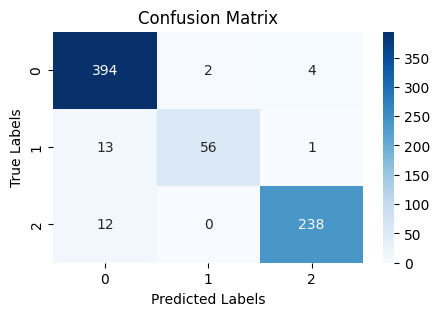

In [ ]:
from sklearn.metrics import confusion_matrix

# Predict labels for test data
predictions = model.predict(test_data, batch_size=64)
predicted_labels = np.argmax(predictions, axis=1)

# Create confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Melihat classification report pada data testing
print(classification_report(test_labels, labels_pred_bool))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       400
           1       0.97      0.80      0.88        70
           2       0.98      0.95      0.97       250

    accuracy                           0.96       720
   macro avg       0.96      0.91      0.93       720
weighted avg       0.96      0.96      0.95       720



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, matthews_corrcoef

# Menghitung accuracy score
accuracy = (total_right / len(test_labels))
print("Accuracy score: {:.2f}%".format(accuracy * 100))

# Menghitung precision score
precision = precision_score(test_labels, labels_pred_bool, average='macro')
print("Precision score: {:.2f}%".format(precision * 100))

# Menghitung recall score
recall = recall_score(test_labels, labels_pred_bool, average='macro')
print("Recall score: {:.2f}%".format(recall * 100))

# Menghitung F1 score
f1 = f1_score(test_labels, labels_pred_bool, average='macro')
print("F1 score: {:.2f}%".format(f1 * 100))

# Menghitung Matthews Correlation Coefficient
mcc = matthews_corrcoef(test_labels, labels_pred_bool)
print("Matthews Correlation Coefficient: {:.2f}".format(mcc))

# Menghitung confusion matrix
print("\nConfusion matrix:")
pd.DataFrame(confusion_matrix((test_labels), labels_pred_bool), columns= ["Normal", "TBC", "Pneumonia"], index= ["Normal", "TBC", "Pneumonia"])

Accuracy score: 95.56%
Precision score: 96.18%
Recall score: 91.23%
F1 score: 93.42%
Matthews Correlation Coefficient: 0.92

Confusion matrix:


,Normal,TBC,Pneumonia
Normal,394,2,4
TBC,13,56,1
Pneumonia,12,0,238


In [ ]:
# import pandas as pd

# # Mengekstraksi fitur dari model CNN
# features = model.predict(train_data, batch_size=64)

# # Membuat DataFrame dari fitur
# df = pd.DataFrame(features)

# # Menyimpan DataFrame ke dalam file CSV
# df.to_csv('/content/drive/MyDrive/aftersempro/augmentasi/80-10-10/hasil_ekstraksi_train.csv', index=False)

In [ ]:
# import pandas as pd

# # Mengekstraksi fitur dari model CNN
# features = model.predict(val_data, batch_size=64)

# # Membuat DataFrame dari fitur
# df = pd.DataFrame(features)

# # Menyimpan DataFrame ke dalam file CSV
# df.to_csv('/content/drive/MyDrive/aftersempro/augmentasi/80-10-10//hasil_ekstraksi_val.csv', index=False)

In [ ]:
# import pandas as pd

# # Mengekstraksi fitur dari model CNN
# features = model.predict(test_data, batch_size=64)

# # Membuat DataFrame dari fitur
# df = pd.DataFrame(features)

# # Menyimpan DataFrame ke dalam file CSV
# df.to_csv('/content/drive/MyDrive/aftersempro/augmentasi/80-10-10/hasil_ekstraksi_test.csv', index=False)

In [ ]:
# Save ekstraksi fitur
feature_extraction_model = keras.Model(inputs=model.input, outputs=model.layers[-2].output)
feature_extraction_model.save('/content/drive/MyDrive/Fix/dataset-7200/collab-ekstraksi-cnn-svm-manual.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Menyimpan model
# seluruh model akan disimpan, termasuk lapisan output terakhir, yang mungkin tidak sesuai untuk tujuan ekstraksi fitur saja.
model.save('/content/drive/MyDrive/Fix/dataset-7200/collab-fullmodel-cnn-svm-manual.h5')

### Save Kernel & Visualize Featuremap

In [ ]:
# Create an empty DataFrame to store kernel data
kernel_df = pd.DataFrame()

# Iterate through the layers to extract kernel data
for idx, layer in enumerate(dense_net.layers):
    if isinstance(layer, keras.layers.Conv2D):
        layer_name = f'conv_layer_{idx}'
        kernel_weights = layer.get_weights()[0]  # Get the kernel weights
        kernel_df[layer_name] = [kernel_weights]

# Save kernel data to an Excel file
excel_file_path = './kernel_data.xlsx'
kernel_df.to_excel(excel_file_path, index=False)
print(f'Kernel data saved to {excel_file_path}')

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

def visualize_feature_map(model, image):
    # Preprocess the image
    image = cv2.resize(image, (224, 224))
    image = np.expand_dims(image, axis=0)
    image = image / 255.0

    # Get the feature map outputs from the intermediate layers
    layer_names = [layer.name for layer in model.layers[1:-1]]
    layer_outputs = [layer.output for layer in model.layers[1:-1]]
    activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)
    activations = activation_model.predict(image)

    # Visualize the feature maps
    for layer_name, feature_map in zip(layer_names, activations):
        if len(feature_map.shape) < 2:
            continue
        num_channels = feature_map.shape[-1]
        size = feature_map.shape[1]

    # Create a grid of subplots to display the feature maps
    rows = num_channels // 8 + 1
    fig, axs = plt.subplots(rows, 8, figsize=(16, rows * 2))

    for i in range(num_channels):
        row = i // 8
        col = i % 8
        axs[row, col].imshow(feature_map[0, :, :, i], cmap='viridis')
        axs[row, col].axis('off')

    fig.suptitle(layer_name, fontsize=16)
    plt.show()

# Load a pre-trained model
model = tf.keras.applications.DenseNet169(weights='imagenet', include_top=False)

# Load an input image
image = cv2.imread('../../../Person-1.png')

# Visualize the feature maps
visualize_feature_map(model, image)

In [ ]:
from tensorflow.keras.utils import img_to_array

#visual featuremap
img_path = '../../../Person-1.png'

#load model
#variabel penanda akhir layer feature map
successive_outputs = [layer.output for layer in model.layers]
#variabel menyimpan proses feature map tiap layer
visualization_model = tf.keras.models.Model(inputs=model.input, outputs=successive_outputs)

# Load image
# preprocessing image yg diinput
img = cv2.imread(os.path.join(img_path), cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (224, 224))
img_rgb = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)  # Convert grayscale to RGB
x = img_to_array(img_rgb)
x = np.expand_dims(x, axis=0)
x /= 255.0

# input img ke model
successive_feature_maps = visualization_model.predict(x) # load nama layer untuk ditampilkan
layer_names = [layer.name for layer in model.layers] #perulangan menyimpan transform tiap layer CNN

# Create the directory if it doesn't exist
output_dir = 'data_featuremaps'
os.makedirs(output_dir, exist_ok=True)

# Save feature maps in separate directories
for layer_name, feature_map in zip(layer_names, successive_feature_maps[0:]):
    if len(feature_map.shape) == 4:
        layer_dir = os.path.join(output_dir, layer_name)
        os.makedirs(layer_dir, exist_ok=True)
        n_features = min(feature_map.shape[-1], 16)  # Limit to maximum 16 feature maps
        for i in range(n_features):
            filt = feature_map[0, :, :, i]
            filt -= filt.mean()
            filt /= filt.std()
            filt *= 64
            filt += 128
            filt = np.clip(filt, 0, 255).astype('uint8')
            file_path = os.path.join(layer_dir, f'feature_{i}.xlsx')
            df = pd.DataFrame(filt)
            df.to_excel(file_path, index=False)

for layer_name, feature_map in zip(layer_names, successive_feature_maps[0:]):
    print(layer_name)
    print(feature_map.shape)
    if len(feature_map.shape) == 4:
        layer_dir = os.path.join(output_dir, layer_name)
        os.makedirs(layer_dir, exist_ok=True)  # Create the directory if it doesn't exist
        writer2 = pd.ExcelWriter(os.path.join(layer_dir, 'feature.xlsx'))
        n_features = feature_map.shape[-1] # jumlah feature map

    #tampilan subplot
    # mengambil beberapa contoh transform tiap layer CNN
    if feature_map.shape[3] <= 64:
        colm = feature_map.shape[3] / 4
        row = feature_map.shape[3] / colm
        fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(15, 15), subplot_kw={'xticks': [], 'yticks': []})
    else:
        colm = feature_map.shape[3] / 8
        row = feature_map.shape[3] / colm
        fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(15, 15), subplot_kw={'xticks': [], 'yticks': []})

    #input feature map
    kernel = []
    for i in range(n_features):
            if feature_map.shape[-1] == 3:
                filt = feature_map[0, :, :, 0]  # Use only the first channel
            else:
                filt = feature_map[0, :, :, i]
            filt -= filt.mean()
            filt /= filt.std()
            filt *= 64
            filt += 128
            filt = np.clip(filt, 0, 255).astype('uint8')
            kernel.append(filt)

    for i in range(n_features):
            df = pd.DataFrame(kernel[i])
            file_path = os.path.join(layer_dir, f'feature_{i}.xlsx')
            df.to_excel(file_path, index=False)

    #input feature ke subplot
    for ax, grid in zip(axs.flat, kernel):
        ax.set_title(layer_name)
        ax.imshow(grid, aspect='equal', cmap='viridis', interpolation='nearest')
    plt.tight_layout()
    plt.show()

### Training Visualization

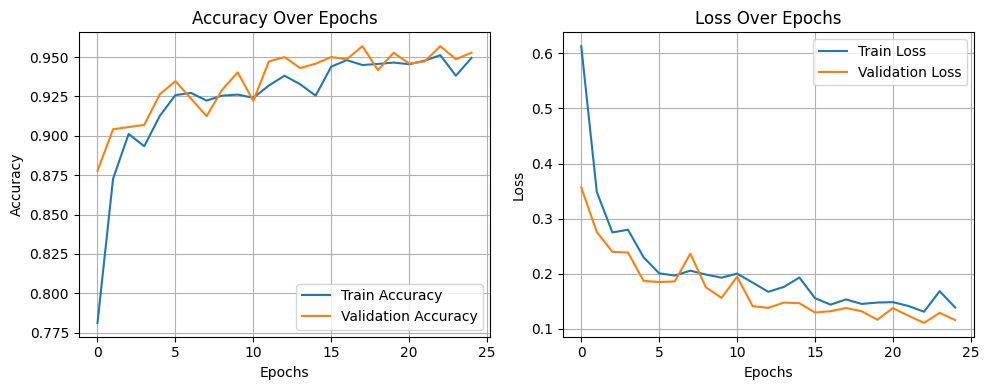

In [ ]:
import matplotlib.pyplot as plt

# Mengatur ukuran gambar (figure)
plt.figure(figsize=(10, 4))  # Mengatur lebar 12 inch dan tinggi 6 inch

# Melihat riwayat akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)  # Menambahkan grid pada plot

# Melihat riwayat loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)  # Menambahkan grid pada plot

plt.tight_layout()  # Menyusun plot agar rapi
plt.show()

## SVM FIX

In [22]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, matthews_corrcoef
import keras

# Load the saved CNN model
loaded_model = keras.models.load_model("/content/drive/MyDrive/Fix/dataset-7200/collab-ekstraksi-cnn-svm-manual.h5")

# Extract features from the loaded model
train_features = loaded_model.predict(train_data, batch_size=64)
val_features = loaded_model.predict(val_data, batch_size=64)
test_features = loaded_model.predict(test_data, batch_size=64)

# Train the model using SGD
def train_svm(features, labels, learning_rate=0.001, num_epochs=25):
    num_samples, num_features = features.shape
    num_classes = len(np.unique(labels))
    weights = np.zeros((num_classes, num_features))
    biases = np.zeros(num_classes)

    for epoch in range(num_epochs):
        features, labels = shuffle(features, labels)  # Shuffle the data in each epoch
        for i in range(num_samples):
            x = features[i]
            y = labels[i]
            scores = np.dot(weights, x) + biases
            correct_class_score = scores[y]
            for j in range(num_classes):
                if j == y:
                    continue
                margin = scores[j] - correct_class_score + 1
                if margin > 0:
                    weights[y] += learning_rate * x
                    weights[j] -= learning_rate * x
                    biases[y] += learning_rate
                    biases[j] -= learning_rate

    return weights, biases

# Prediction using SVM model
def predict_svm(features, weights, biases):
    scores = np.dot(features, weights.T) + biases
    return np.argmax(scores, axis=1)

# Train the SVM model on training data
learning_rate = 0.001
num_epochs = 25
svm_weights, svm_biases = train_svm(train_features, train_labels, learning_rate, num_epochs)

# Predict using the SVM model
svm_train_predictions = predict_svm(train_features, svm_weights, svm_biases)
svm_val_predictions = predict_svm(val_features, svm_weights, svm_biases)
svm_test_predictions = predict_svm(test_features, svm_weights, svm_biases)

# Calculate evaluation metrics
train_accuracy = accuracy_score(train_labels, svm_train_predictions) * 100.0
val_accuracy = accuracy_score(val_labels, svm_val_predictions) * 100.0
test_accuracy = accuracy_score(test_labels, svm_test_predictions) * 100.0

print("Training Accuracy (SVM): {:.2f}%".format(train_accuracy))
print("Validation Accuracy (SVM): {:.2f}%".format(val_accuracy))
print("Test Accuracy (SVM): {:.2f}%".format(test_accuracy))

12/12 [==============================] - 2s 209ms/step
Training Accuracy (SVM): 97.19%
Validation Accuracy (SVM): 96.25%
Test Accuracy (SVM): 96.25%


In [48]:
from sklearn.metrics import classification_report

# Create classification report
# train_report = classification_report(train_labels, svm_train_predictions)
# val_report = classification_report(val_labels, svm_val_predictions)
test_report = classification_report(svm_test_predictions, test_labels)

# Print classification report
# print("Training Classification Report:\n", train_report)
# print("Validation Classification Report:\n", val_report)
print("Test Classification Report:\n", test_report)

Test Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97       412
           1       0.86      0.95      0.90        63
           2       0.96      0.98      0.97       245

    accuracy                           0.96       720
   macro avg       0.93      0.96      0.95       720
weighted avg       0.96      0.96      0.96       720



In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Calculate evaluation metrics for train data
train_accuracy = accuracy_score(train_labels, svm_train_predictions)
train_precision = precision_score(train_labels, svm_train_predictions, average='macro')
train_recall = recall_score(train_labels, svm_train_predictions, average='macro')
train_f1_score = f1_score(train_labels, svm_train_predictions, average='macro')
train_mcc = matthews_corrcoef(train_labels, svm_train_predictions)

# Calculate evaluation metrics for val data
val_accuracy = accuracy_score(val_labels, svm_val_predictions)
val_precision = precision_score(val_labels, svm_val_predictions, average='macro')
val_recall = recall_score(val_labels, svm_val_predictions, average='macro')
val_f1_score = f1_score(val_labels, svm_val_predictions, average='macro')
val_mcc = matthews_corrcoef(val_labels, svm_val_predictions)

# Calculate evaluation metrics for val data
test_accuracy = accuracy_score(test_labels, svm_test_predictions)
test_precision = precision_score(test_labels, svm_test_predictions, average='macro')
test_recall = recall_score(test_labels, svm_test_predictions, average='macro')
test_f1_score = f1_score(test_labels, svm_test_predictions, average='macro')
test_mcc = matthews_corrcoef(test_labels, svm_test_predictions)

# Print evaluation metrics for train data
print("Train Accuracy: {:.2f}%".format(train_accuracy * 100))
print("Train Precision: {:.2f}".format(train_precision * 100))
print("Train Recall: {:.2f}".format(train_recall* 100))
print("Train F1-Score: {:.2f}".format(train_f1_score* 100))
print("Train MCC: {:.2f}".format(train_mcc))
print(" ")

# Print evaluation metrics for val data
print("Val Accuracy: {:.2f}%".format(val_accuracy * 100))
print("Val Precision: {:.2f}".format(val_precision))
print("Val Recall: {:.2f}".format(val_recall))
print("Val F1-Score: {:.2f}".format(val_f1_score))
print("Val MCC: {:.2f}".format(val_mcc))
print(" ")

# Print evaluation metrics for val data
print("test Accuracy: {:.2f}%".format(test_accuracy * 100))
print("test Precision: {:.2f}".format(test_precision * 100))
print("test Recall: {:.2f}".format(test_recall * 100))
print("test F1-Score: {:.2f}".format(test_f1_score * 100))
print("test MCC: {:.2f}".format(test_mcc))

Train Accuracy: 97.19%
Train Precision: 97.33
Train Recall: 95.46
Train F1-Score: 96.36
Train MCC: 0.95
 
Val Accuracy: 96.25%
Val Precision: 0.95
Val Recall: 0.94
Val F1-Score: 0.95
Val MCC: 0.93
 
test Accuracy: 96.25%
test Precision: 96.20
test Recall: 93.32
test F1-Score: 94.66
test MCC: 0.93


In [47]:
# Calculate confusion matrix
cf = pd.DataFrame(confusion_matrix(svm_test_predictions, test_labels), columns=["Normal", "TBC", "Pneumonia"], index=["Normal", "TBC", "Pneumonia"])
print("\nConfusion matrix Model SVM:")
print(cf)

# Calculate accuracy score
accuracy = accuracy_score(svm_test_predictions, test_labels)
print("\nAccuracy score: {:.2f}%".format(accuracy * 100))

# Calculate precision score
precision = precision_score(svm_test_predictions, test_labels, average='macro')
print("Precision score: {:.2f}%".format(precision * 100))

# Calculate recall score
recall = recall_score(svm_test_predictions, test_labels, average='macro')
print("Recall score: {:.2f}%".format(recall * 100))

# Calculate F1 score
f1 = f1_score(svm_test_predictions, test_labels, average='macro')
print("F1 score: {:.2f}%".format(f1 * 100))

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(svm_test_predictions, test_labels)
print("Matthews Correlation Coefficient: {:.2f}".format(mcc))


Confusion matrix Model SVM:
           Normal  TBC  Pneumonia
Normal        393    9         10
TBC             3   60          0
Pneumonia       4    1        240

Accuracy score: 96.25%
Precision score: 93.32%
Recall score: 96.20%
F1 score: 94.66%
Matthews Correlation Coefficient: 0.93


In [42]:
# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(test_labels, svm_test_predictions)
print("Matthews Correlation Coefficient: ", mcc)

Matthews Correlation Coefficient:  0.9328956056844057


In [27]:
# Calculate confusion matrix
cf = pd.DataFrame(confusion_matrix(test_labels, svm_test_predictions), columns=["Normal", "TBC", "Pneumonia"], index=["Normal", "TBC", "Pneumonia"])
print("\nConfusion matrix Model SVM:")
print(cf)

print("\nData Test")

# Calculate accuracy score
accuracy = accuracy_score(svm_test_predictions, test_labels)
print("Accuracy score: {:.2f}%".format(accuracy * 100))

# Calculate precision score
precision = precision_score(svm_test_predictions, test_labels, average='micro')
print("Precision score: {:.2f}%".format(precision * 100))

# Calculate recall score
recall = recall_score(svm_test_predictions, test_labels, average='micro')
print("Recall score: {:.2f}%".format(recall * 100))

# Calculate F1 score
f1 = f1_score(svm_test_predictions, test_labels, average='micro')
print("F1 score: {:.2f}%".format(f1 * 100))

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(svm_test_predictions, test_labels)
print("Matthews Correlation Coefficient: {:.2f}".format(mcc))


Confusion matrix Model SVM:
           Normal  TBC  Pneumonia
Normal        393    3          4
TBC             9   60          1
Pneumonia      10    0        240

Data Test
Accuracy score: 96.25%
Precision score: 96.25%
Recall score: 96.25%
F1 score: 96.25%
Matthews Correlation Coefficient: 0.93


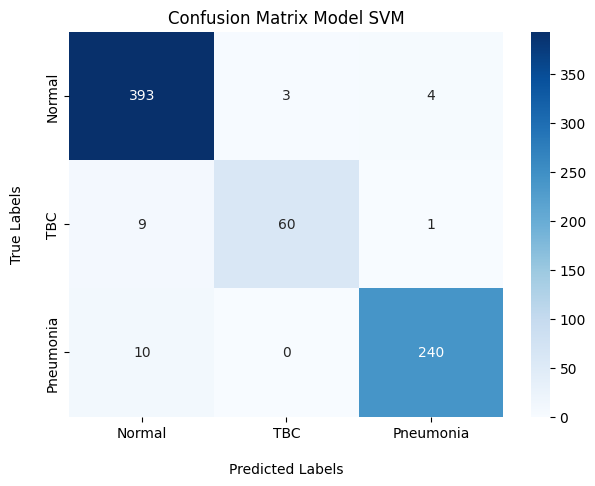

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat confusion matrix
cf = pd.DataFrame(confusion_matrix(test_labels, svm_test_predictions), columns=["Normal", "TBC", "Pneumonia"], index=["Normal", "TBC", "Pneumonia"])

# Membuat plot menggunakan seaborn
plt.figure(figsize=(7, 5))
sns.heatmap(cf, annot=True, cmap="Blues", fmt="d")

# Menambahkan label pada sumbu x dan y
plt.xlabel("\nPredicted Labels")
plt.ylabel("True Labels\n")

# Menambahkan judul pada plot
plt.title("Confusion Matrix Model SVM")

# Menampilkan plot
plt.show()

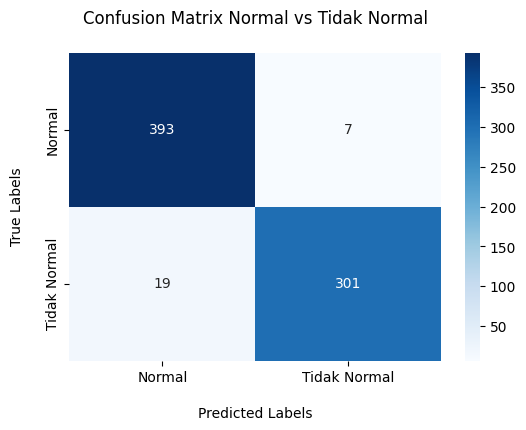

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define class labels
class_labels = ["Normal", "Tidak Normal"]

# Combine TBC and Pneumonia labels into one label "Tidak Normal"
train_labels_combined = np.where(train_labels != 0, 1, 0)
val_labels_combined = np.where(val_labels != 0, 1, 0)
test_labels_combined = np.where(test_labels != 0, 1, 0)

# Predict using the SVM model
svm_train_predictions_combined = np.where(svm_train_predictions != 0, 1, 0)
svm_val_predictions_combined = np.where(svm_val_predictions != 0, 1, 0)
svm_test_predictions_combined = np.where(svm_test_predictions != 0, 1, 0)

# Create confusion matrices
cf_train = confusion_matrix(svm_train_predictions_combined, train_labels_combined)
cf_val = confusion_matrix(svm_val_predictions_combined, val_labels_combined)
cf_test = confusion_matrix(test_labels_combined, svm_test_predictions_combined)

# Display the confusion matrices
cf_train_df = pd.DataFrame(cf_train, columns=class_labels, index=class_labels)
cf_val_df = pd.DataFrame(cf_val, columns=class_labels, index=class_labels)
cf_test_df = pd.DataFrame(cf_test, columns=class_labels, index=class_labels)

# Define a function to plot a confusion matrix
def plot_confusion_matrix(cf_matrix, class_names):
    df_cm = pd.DataFrame(cf_matrix, index=class_names, columns=class_names)
    plt.figure(figsize=(6, 4))
    sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='g')
    plt.title('Confusion Matrix Normal vs Tidak Normal\n')
    plt.xlabel('\nPredicted Labels')
    plt.ylabel('True Labels\n')
    plt.show()

# plot_confusion_matrix(cf_train, class_labels)
# plot_confusion_matrix(cf_val, class_labels)
plot_confusion_matrix(cf_test, class_labels)

In [30]:
# Create confusion matrix for test data
cm = confusion_matrix(test_labels, svm_test_predictions)

# Hitung jumlah data yang diprediksi benar untuk setiap kelas
correct_per_class = np.diag(cm)

# Cetak jumlah data yang diprediksi benar untuk setiap kelas
for i, correct in enumerate(correct_per_class):
    print(f'Kelas {i}: {correct} data terprediksi benar')

# Total jumlah data yang diprediksi benar
total_correct = np.sum(correct_per_class)
print(f'Total data terprediksi benar: {total_correct}')

Kelas 0: 393 data terprediksi benar
Kelas 1: 60 data terprediksi benar
Kelas 2: 240 data terprediksi benar
Total data terprediksi benar: 693


In [46]:
import pandas as pd

# Membuat DataFrame
df = pd.DataFrame({'Actual Label': test_labels, 'Predicted Label': svm_test_predictions})

# Menambahkan kolom 'Prediction'
df['Prediction'] = df['Actual Label'] == df['Predicted Label']

# Mencetak data yang hasil klasifikasinya tidak sesuai dengan data aktual
misclassified_data = df[df['Prediction'] == False]

# Menghitung jumlah total data yang salah klasifikasi
total_misclassified = len(misclassified_data)

# Cetak DataFrame dengan data yang salah klasifikasi
print(misclassified_data)

# Cetak total data yang salah klasifikasi
print(" ")
print(f'Total data yang salah di klasifikasi: {total_misclassified}')

     Actual Label  Predicted Label  Prediction
26              0                2       False
34              0                2       False
39              0                2       False
48              0                2       False
85              0                1       False
97              0                1       False
141             0                1       False
407             1                0       False
408             1                0       False
416             1                0       False
422             1                2       False
423             1                0       False
433             1                0       False
443             1                0       False
444             1                0       False
451             1                0       False
465             1                0       False
470             2                0       False
473             2                0       False
477             2                0       False
497          

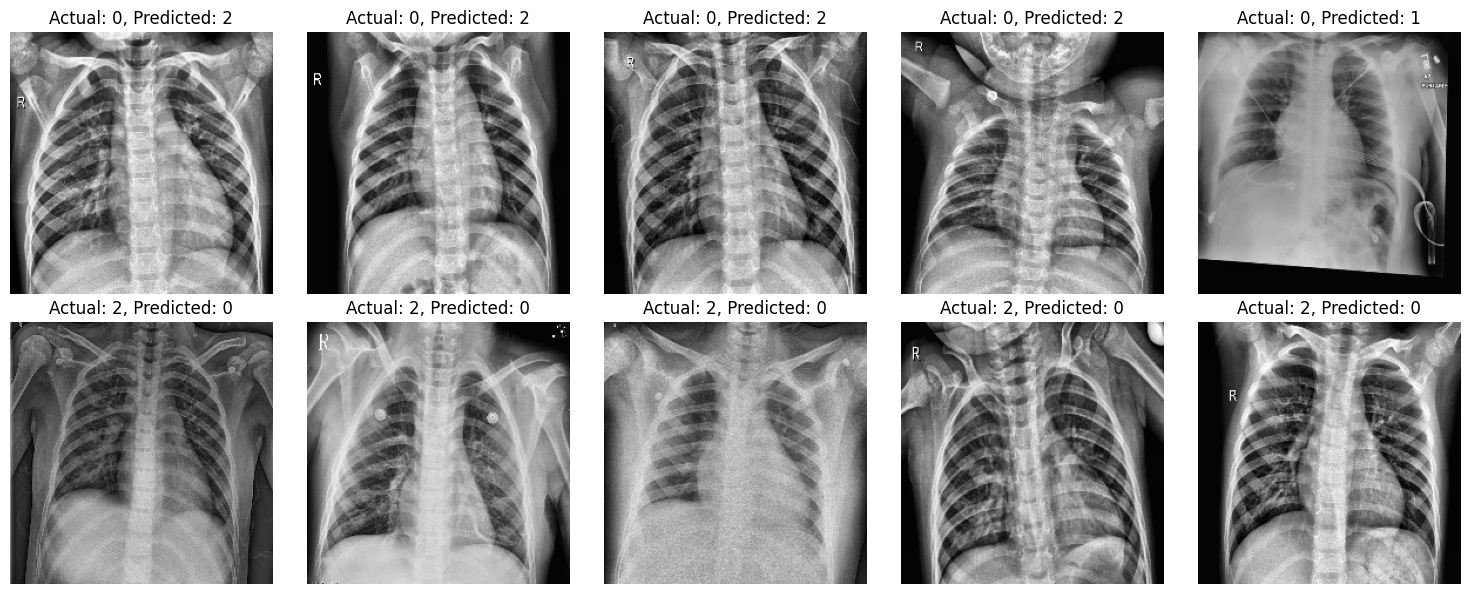

In [49]:
import matplotlib.pyplot as plt

def display_misclassified_images(misclassified_data, test_data):
    num_misclassified = len(misclassified_data)
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))

    for i, (index, row) in enumerate(misclassified_data.iterrows()):
        actual_label = row['Actual Label']
        predicted_label = row['Predicted Label']
        is_correct = row['Prediction']
        if not is_correct:
            if i < 5:  # Menampilkan di baris pertama
                axes[0, i].imshow(test_data[index])
                axes[0, i].set_title(f'Actual: {actual_label}, Predicted: {predicted_label}')
                axes[0, i].axis('off')
            else:  # Menampilkan di baris kedua
                axes[1, i % 5].imshow(test_data[index])
                axes[1, i % 5].set_title(f'Actual: {actual_label}, Predicted: {predicted_label}')
                axes[1, i % 5].axis('off')

    plt.tight_layout()
    plt.show()

display_misclassified_images(misclassified_data, test_data)

In [50]:
import pickle

# Save SVM model
svm_model_path = "/content/drive/MyDrive/Fix/dataset-7200/collab-cnn-svm-manual.pkl"
with open(svm_model_path, 'wb') as f:
    pickle.dump((svm_weights, svm_biases), f)

## Predict on New Image

1/1 [==============================] - 2s 2s/step
Positive Tuberculosis


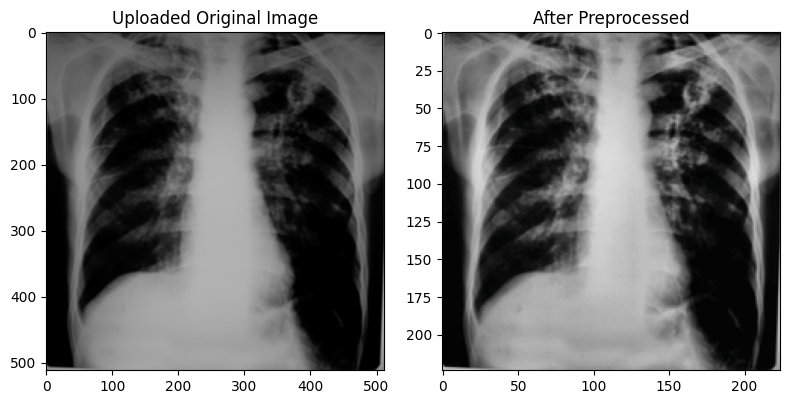

In [ ]:
import cv2
import keras
import pickle
import numpy as np

# Load the SVM classifier from the pickle file
svm_model_filename = '/content/drive/MyDrive/Fix/dataset-7200/collab-cnn-svm-manual.pkl'
with open(svm_model_filename, 'rb') as model_file:
    svm_weights, svm_biases = pickle.load(model_file)

# Load the saved feature extractor model
feature_extractor = keras.models.load_model("/content/drive/MyDrive/Fix/dataset-7200/collab-ekstraksi-cnn-svm-manual.h5")
feature_extractor.compile(optimizer='adam', loss='categorical_crossentropy')

# Function to preprocess the image
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    clahe_image = apply_clahe(image)
    resized_image = cv2.resize(clahe_image, (224, 224))
    return resized_image

# Path to the new image to be predicted
new_image_path = "/content/Tuberculosis-1.png"

# Preprocess the new image
resized_image = preprocess_image(new_image_path)

# Extract features from the preprocessed image using the loaded feature extractor
new_image_features = feature_extractor.predict(np.expand_dims(resized_image, axis=0))

# Predict the label using the SVM weights and biases
scores = np.dot(new_image_features, svm_weights.T) + svm_biases
prediction = np.argmax(scores)

# Print the predicted label
if prediction == 0:
    print("Normal")
elif prediction == 1:
    print("Positive Tuberculosis")
else:
    print("Positive Pneumonia")

# Display the original and preprocessed images
plt.figure(figsize=(8, 4))

# Original image
plt.subplot(1, 2, 1)
original_image = cv2.imread(new_image_path)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title("Uploaded Original Image")
plt.axis('on')

# Preprocessed image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.title("After Preprocessed")
plt.axis('on')

plt.tight_layout()
plt.show()